In [8]:
import pandas as pd

lyrics_df = pd.read_json(r'./Dataset/top_songs_lyrics.json')
lyrics_df.head()

,year,artist,song,lyrics
0,2014,Ed Sheeran,Thinking out Loud,[Verse 1]\nWhen your legs don't work like they...
1,2014,Norah Jones,Come Away With Me,[Verse 1]\nCome away with me in the night\nCom...
2,2014,Troye Sivan,Happy Little Pill,"[Verse 1]\nIn the crowd, alone\nAnd every seco..."
3,2014,The Script,Superheroes,"[Verse 1]\nAll her life, she has seen\nOh the ..."
4,2014,Ellie Goulding,How Long Will I Love You,[Intro]\nMm\nMm\n[Verse 1]\nHow long will I lo...


In [9]:
lyrics_df.columns

Index(['year', 'artist', 'song', 'lyrics'], dtype='object')

# Extract common words from song lyrics

1) pre-process the lyrics: convert them to lowercase, remove punctuation, tokenizing the text into words
2) Translate songs into english 
3) remove stopwords
    - default
    - custom stopwords to remove the words I felt irrelevant to the analysis
4) Count the words
5) Display the most common words

In [10]:
from googletrans import Translator
import pandas as pd
import json
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

#download stopwords
# nltk.download('stopwords')
# nltk.download('punkt')

# initialize transaltor
translator = Translator()

#define function to translate lyrics to english
def translate_lyrics(lyrics):
    try:
        return translator.translate(lyrics, dest='en').text
    except Exception as e:
        print(f'Error in Translation: {e}')
        return lyrics

#translate lyrics to english
lyrics_df['translated_lyrics'] = lyrics_df['lyrics'].apply(translate_lyrics)

# get the list of stopwords - default & custom
default_stopwords = set(stopwords.words('english'))
custom_stopwords = default_stopwords.union(
    {'verse', 'chorus', '–', 'im', 'oh', 'na', 'yeah', 'got', 'ooh', 'wan', 'cause', 'ill', 'youre', '2', '1', 
     'ft', 'like', 'one', 'prechorus','la', 'aint', 'low', 'two', 'woah', 'gettin', 'postchorus', 'mmm', 'mxrxgxa', 'da', 'thank',
     'ah', 'gon', 'ya', "’", 'thats', 'another', 'outro', 'ive', 'hey', 'montenero', 'whats', 'gioielli', 'clap', 'del', 'blue', 'zyrtck',
     'bridge', 'dj', 'would', 'way', 'ta', 'em', 'yes', 'youd', 'didnt', 'nothin', 'nothing', 'ayy',
     'maybe', 'redrum', 'ohoh', 'ariana', 'vacca', 'bout', 'grande', '21', 'youve', 'youll', 'somethin', 'beyoncé',
     'id', 'smack', 'yo', 'freestyle', 'without', 'di', 'intro', 'woo', 'might', 'il', 'non', 'uh', 'knew', 'mm',
     'anybody', 'hes', 'ima', 'e', 'x', 'itll', 'refrain', 'could', 'ee', 'comin', 'lil', 'shes', '3', 'halo', 'whats', 
     'gionni', 'sometimes', 'gunz', 'ride', 'blow', 'black','mutha', 'uhoh', 'pai', 'zeno', 'wouldnt', 'air',
     'egreen', 'toni', 'georgia', 'throw', 'nah', 'cease', 'goes', 'dust', 'bet', 'bum', 'apart', 'doesnt', 'cassel', 'oohoohoohooh', 
     'huh', 'closet', 'goin', 'cleanin', 'claver', 'closet', 'nex', 'lot', 'michaels', 'less', 'things', 'per', 'second', 'line',
     'bites', 'shall', 'everybody', 'ele', 'fit', 'ho', 'jp', 'joe', 'smokestackstudio', 'getting', 'aleaka', 'three',
     })

# process the lyrics
    # convert to lower case
    # remove punctuation -  !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`
    # tokenize by spliting on whitespace
    # remove stopwords
def preprocess_lyrics(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in custom_stopwords]
    return words

# count the words
all_words = []
for lyrics in lyrics_df['translated_lyrics']:
    words = preprocess_lyrics(lyrics)
    all_words.extend(words)

word_counts = Counter(all_words)

#display the most common words
most_common_words = word_counts.most_common()
# for word, count in most_common_words:
#     print(f"{word}: {count}")
                    

In [11]:
# #save to csv file 
# df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
# filename= 'most_common_words.csv'
# df.to_csv(filename, index=False)

# Wordcloud

- install wordcloud in conda environment: conda install -c conda-forge wordcloud


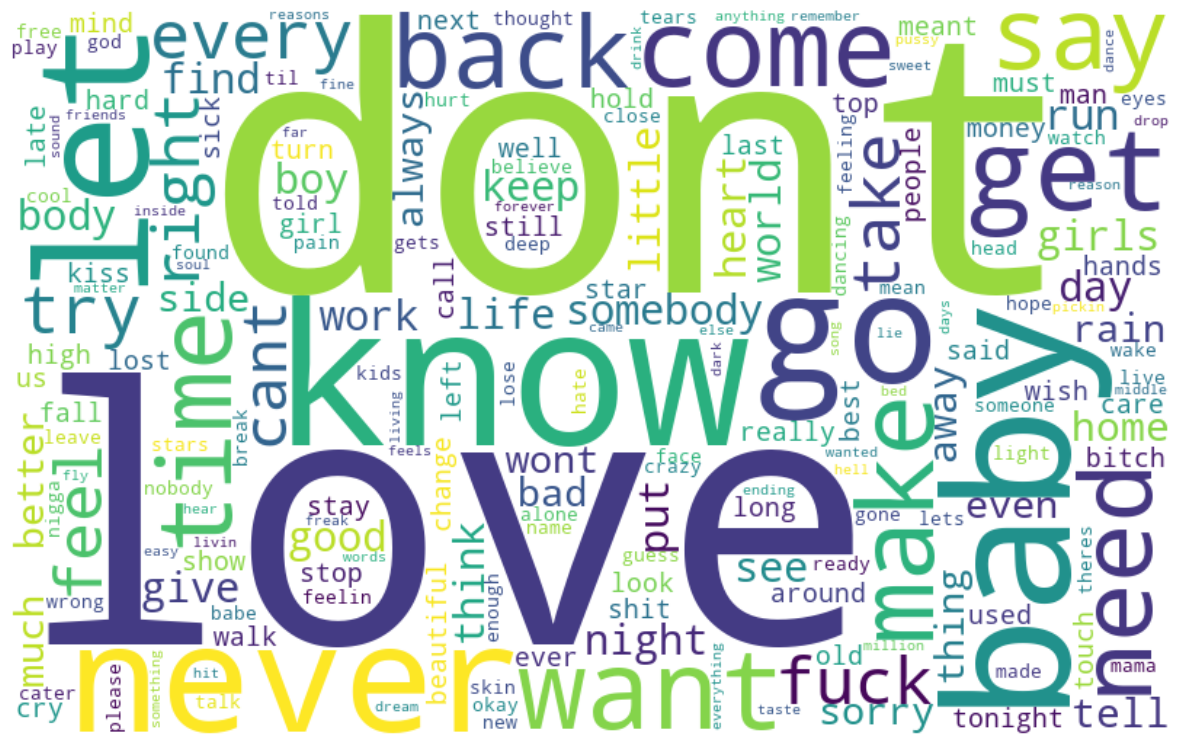

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#convert most common words to a dictionary
word_frequency = dict(most_common_words)

#create a wordl cloud object
wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_frequency)

#display the word cloud 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()